In [1]:
# Originally from: https://towardsdatascience.com/stable-diffusion-using-hugging-face-501d8dbdd8
# CLIP VIT Large Patch 14: https://huggingface.co/openai/clip-vit-large-patch14
from transformers import CLIPTextModel, CLIPTokenizer

## Initiating tokenizer and encoder.
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

In [7]:
# How a prompt is encoded

prompt = ["illustration of a cat with a wizard hat"]
token = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
print(token.input_ids.shape)
token.input_ids

for t in list(token.input_ids[0,:20]): 
    print(f"{t}:{tokenizer.convert_ids_to_tokens(int(t))}")

torch.Size([1, 77])
49406:<|startoftext|>
6052:illustration</w>
539:of</w>
320:a</w>
2368:cat</w>
593:with</w>
320:a</w>
14295:wizard</w>
3801:hat</w>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>


In [3]:
import numpy as np
input_ids_on_device = token.input_ids.to("cpu")

emb = text_encoder(input_ids_on_device)

# Convert embeddings to numpy array and round the values
embeddings = emb.last_hidden_state.detach().numpy()
rounded_embeddings = np.round(embeddings, decimals=5)

# Set print options to display the entire array
# np.set_printoptions(threshold=np.inf) # if you want to see the whole array uncomment this line

# Print the rounded embeddings
print(rounded_embeddings)


[[[-0.38838  0.02294 -0.0522  ... -0.48988 -0.3066   0.06745]
  [ 0.02903 -1.32579  0.30845 ... -0.52568  0.97681  0.66517]
  [ 1.15652  0.13184  0.78949 ... -2.10239 -1.15187 -0.33113]
  ...
  [-2.27702 -0.03577  0.61612 ... -1.51366  0.98111  0.6662 ]
  [-2.27834 -0.02209  0.61262 ... -1.50573  0.98867  0.65993]
  [-2.23346  0.02574  0.61307 ... -1.44446  1.04998  0.61947]]]


👇 This is all generated via ChatGPT unsure if correct

Original shape: (1, 77, 768)
Reshaped for PCA: (77, 768)


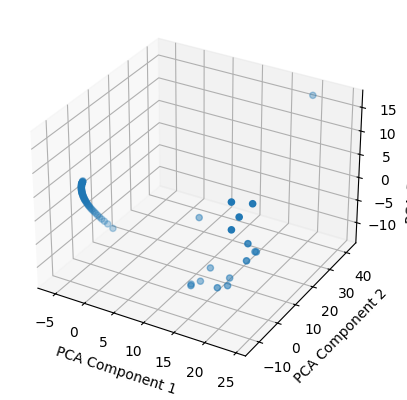

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'embeddings' is your high-dimensional data from the CLIP model
# Convert embeddings to numpy array
embeddings = emb.last_hidden_state.detach().numpy()

# Check the shape of the embeddings
print("Original shape:", embeddings.shape)

# Ensure embeddings are in the format (n_samples, n_features)
# If not, reshape accordingly
# For example, if embeddings.shape is (1, n_tokens, n_features):
if len(embeddings.shape) == 3:
    n_samples, n_tokens, n_features = embeddings.shape
    embeddings_reshaped = embeddings.reshape(n_samples * n_tokens, n_features)
else:
    embeddings_reshaped = embeddings

print("Reshaped for PCA:", embeddings_reshaped.shape)

# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings_reshaped)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three PCA components
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()
